**Deep Neural Network fashion_mnist dataset Train with two Dense layers**
**Import TensorFlow**


In [6]:
import tensorflow as tf
print("You are using TensorFlow version", tf.version)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")  

You are using TensorFlow version <module 'tensorflow._api.v2.version' from 'C:\\Users\\lggoo\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Enable a GPU before running this notebook.


**import keras**

In [7]:
# Using Keras TensorFlow API to define neural network
from tensorflow import keras
import matplotlib.pyplot as plt

**import the Fashion MNIST**

In [8]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4431872/4422102 [==============================] - 2s 0us/step


**Print the train test images**

In [9]:
print(train_images.shape)

(60000, 28, 28)


In [10]:
print(test_images.shape)

(10000, 28, 28)


**Print train labels**

In [11]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Plot the images**

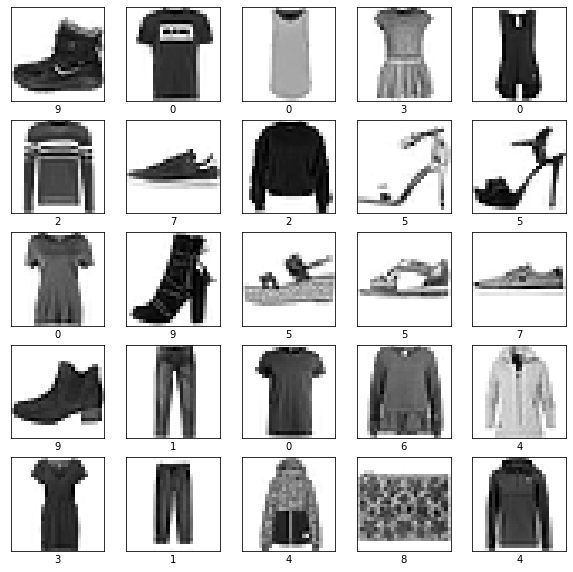

In [15]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**Create the layers**

In [16]:
#A linear model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**Compile the model**

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'] )

In [20]:
EPOCHS=10
model.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4852 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3588 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3263 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3052 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2717 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2587 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2476 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2370 - accuracy: 0.9106
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.230

**Add plots to observe overfitting, create plots to observe overfittings**

In [21]:

history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2200 - accuracy: 0.9165 - val_loss: 0.3266 - val_accuracy: 0.8897
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2139 - accuracy: 0.9189 - val_loss: 0.3833 - val_accuracy: 0.8742
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2070 - accuracy: 0.9204 - val_loss: 0.3926 - val_accuracy: 0.8824
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2011 - accuracy: 0.9237 - val_loss: 0.3497 - val_accuracy: 0.8909
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1930 - accuracy: 0.9260 - val_loss: 0.3750 - val_accuracy: 0.8816
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1880 - accuracy: 0.9274 - val_loss: 0.3797 - val_accuracy: 0.8836
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1824 - accuracy: 0.9304 - val_loss: 0.3680 - val_accuracy:

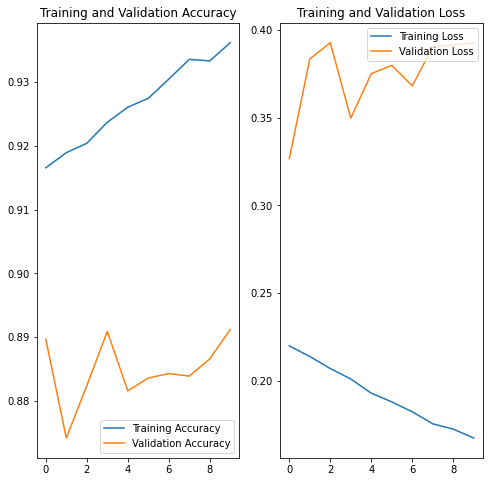

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history ['val_loss']

epochs_range =range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 943us/step - loss: 0.3925 - accuracy: 0.8912

Test accuracy: 0.8912000060081482


In [31]:
predictions = model.predict(test_images)

In [32]:
print(predictions[0])

[1.47294372e-07 7.58738778e-08 1.74875836e-09 1.05755307e-08
 2.76560552e-08 4.37508570e-05 2.83060531e-09 1.61751246e-04
 1.06343155e-11 9.99794304e-01]


In [33]:
print(tf.argmax(predictions[0]))

tf.Tensor(9, shape=(), dtype=int64)
